In [30]:
import pandas as pd

data = pd.read_csv('../../1_datasets/synthetic_retail_data.csv')

In [13]:
data.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [14]:
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [15]:
data.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


73100 Records

In [16]:
data.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

No Missing values

In [17]:
data.info

<bound method DataFrame.info of              Date Store ID Product ID     Category Region  Inventory Level  \
0      2022-01-01     S001      P0001    Groceries  North              231   
1      2022-01-01     S001      P0002         Toys  South              204   
2      2022-01-01     S001      P0003         Toys   West              102   
3      2022-01-01     S001      P0004         Toys  North              469   
4      2022-01-01     S001      P0005  Electronics   East              166   
...           ...      ...        ...          ...    ...              ...   
73095  2024-01-01     S005      P0016    Furniture   East               96   
73096  2024-01-01     S005      P0017         Toys  North              313   
73097  2024-01-01     S005      P0018     Clothing   West              278   
73098  2024-01-01     S005      P0019         Toys   East              374   
73099  2024-01-01     S005      P0020    Groceries   East              117   

       Units Sold  Units Ordere

dContains 5 Stores of Data, Needs Separating into 5 Datasets.

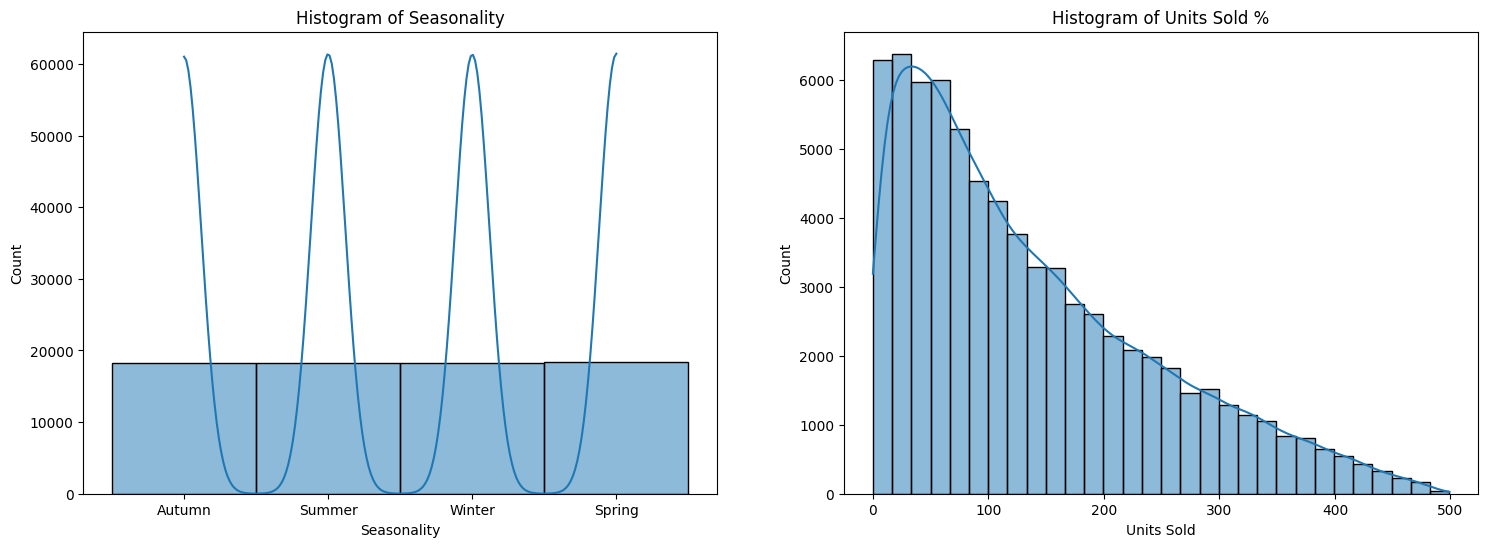

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(data['Seasonality'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Seasonality')

sns.histplot(data['Units Sold'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Units Sold %')
plt.show()




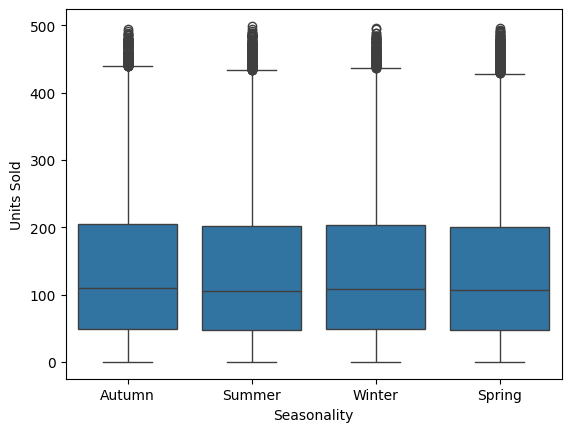

In [23]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot( x="Seasonality", y='Units Sold', data=data, )
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller

adfuller(data['Units Sold'])

(np.float64(-157.7594446575873),
 0.0,
 2,
 73097,
 {'1%': np.float64(-3.4304394637215605),
  '5%': np.float64(-2.861579541402938),
  '10%': np.float64(-2.5667910465330777)},
 np.float64(892421.5823455569))

Stationary as 0.0 is below 0.05 significant level

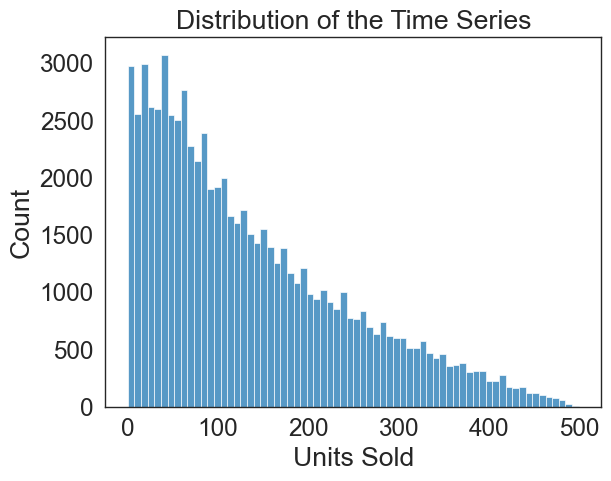

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Units Sold'])
plt.title('Distribution of the Time Series')
plt.show()

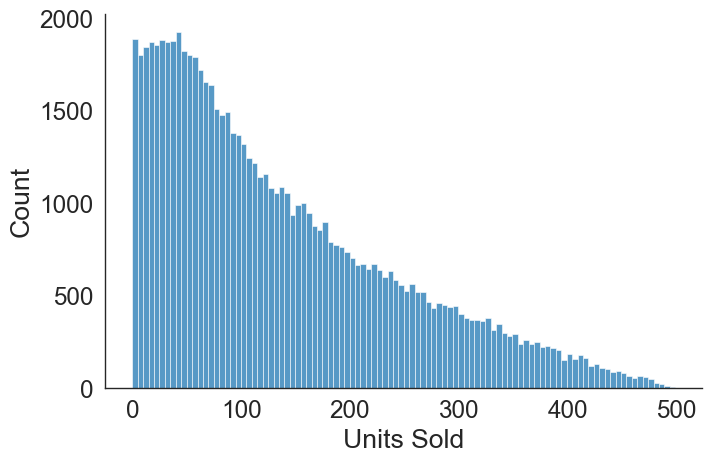

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=data, x="Units Sold", kind="hist", bins = 100, aspect = 1.5)



In [46]:
unitSold = data['Units Sold'].values
f = Fitter(unitSold,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.